In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7.5
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcc2doeXNcTXkgRHJpdmUgKHNnaHlzZWxpQHN0dWRlbnQudWJjLmNhKVxxdWFydG9cZ2l0aHViaW9cY29udGVudFxlb3NjNTU1XGxlY3R1cmVzXHByb2plY3Q='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

C:\Users\sghys\AppData\Local\Temp\ipykernel_22672\2273979560.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap_external.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\zipimport.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\codecs.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\aliases.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\__init__.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\utf_8.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\cp1252.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\io.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\stat.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\_collections_abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\

In [2]:
#| fig-cap: "A PyTorch module to perform forward and adjoint computations for magnetic inversion problems."
#| code-fold: false
#| 
import torch
import torch.nn as nn
import numpy as np
from scipy.constants import mu_0
    
class Magnetics(nn.Module):
    """
    A PyTorch module to perform forward and adjoint computations for magnetic inversion problems.
    """
    def __init__(self, dim, h, dirs, device='cpu'):
        """
        Initialize the Magnetics module.

        Parameters:
            dim (list or tuple): Mesh dimensions [nx, ny, nz].
            h (list or tuple): Cell sizes [dx, dy, dz].
            dirs (list or tuple): Magnetic field directions [I, A, I0, A0] in radians.
                                  I  - Magnetization dip angle
                                  A  - Magnetization declination angle
                                  I0 - Geomagnetic dip angle
                                  A0 - Geomagnetic declination angle
            device (str): Device to perform computations ('cpu' or 'cuda').
        """
        super(Magnetics, self).__init__()
        self.dim = dim
        self.h = h
        self.dirs = dirs
        self.device = device

        # Compute the scaling factor
        dV = torch.prod(self.h.clone().detach())
        mu_0 = 1.0  # Magnetic permeability (set to 1 for simplicity)
        zeta = mu_0 / (4 * np.pi)
        self.mudV = zeta * dV

    def fft_kernel(self, P, center):
        """
        Compute the 2D shifted FFT of the kernel P.

        Parameters:
            P (torch.Tensor): The point spread function (PSF) kernel.
            center (list): Center indices for fftshift.

        Returns:
            torch.Tensor: The shifted FFT of P.
        """
        # Shift the kernel for FFT operations
        S = torch.roll(P, shifts=center, dims=[0, 1])
        S = torch.fft.fftshift(S)
        # Compute the 2D FFT
        S = torch.fft.fft2(S)
        # Shift the quadrants back
        S = torch.fft.fftshift(S)
        return S

    def forward(self, M, height=0):
        """
        Perform the forward computation using FFT.

        Parameters:
            M (torch.Tensor): The magnetization model tensor of shape B,C,X,Y,Z.

        Returns:
            torch.Tensor: The computed magnetic data.
        """
        dz = self.h[2]
        z = height + dz / 2  # Starting depth

        data = 0  # Initialize the data

        # Loop through each layer in the z-direction
        for i in range(M.shape[-1]):
            # Extract the i-th layer of the model
            m_layer = M[..., i].to(self.device)

            # Compute the point spread function (PSF) for the current layer
            psf, center, _ = self.psf_layer(z)

            # Compute the FFT of the PSF kernel
            s_fft = self.fft_kernel(psf, center)

            # Compute the FFT of the model layer
            m_fft = torch.fft.fftshift(m_layer)
            m_fft = torch.fft.fft2(m_fft)
            m_fft = torch.fft.fftshift(m_fft)

            # Perform the convolution in the frequency domain
            b_fft = s_fft * m_fft
            b_fft = torch.fft.fftshift(b_fft)

            # Convert back to the spatial domain
            b_spatial = torch.real(torch.fft.ifft2(b_fft))

            # Accumulate the data from each layer
            data += b_spatial

            # Update depth
            z += dz

        return self.mudV * data

    def adjoint(self, data, height=0):
        """
        Perform the adjoint operation.

        Parameters:
            data (torch.Tensor): The observed magnetic data tensor.

        Returns:
            torch.Tensor: The adjoint result (model update).
        """
        dz = self.h[2]
        z = height + dz / 2  # Starting depth

        # Initialize the result tensor
        m_adj = torch.zeros(
            1, 1, self.dim[0], self.dim[1], self.dim[2], device=self.device
        )

        for i in range(self.dim[2]):
            # Compute the PSF for the current layer
            psf, center, _ = self.psf_layer(z)

            # Compute the FFT of the PSF kernel
            s_fft = self.fft_kernel(psf, center)

            # Compute the FFT of the input data
            data_fft = torch.fft.fft2(data)
            data_fft = torch.fft.fftshift(data_fft)

            # Perform the adjoint operation in the frequency domain
            b_fft = torch.conj(s_fft) * data_fft

            # Convert back to the spatial domain
            b_spatial = torch.fft.fftshift(b_fft)
            b_spatial = torch.real(torch.fft.ifft2(b_spatial))
            b_spatial = torch.fft.fftshift(b_spatial)

            # Store the result for the current layer
            m_adj[..., i] = b_spatial

            # Update depth
            z += dz

        return self.mudV * m_adj

    def psf_layer(self, z):
        """
        Compute the point spread function (PSF) for a layer at depth z.

        Parameters:
            z (float): The depth of the layer.

        Returns:
            psf (torch.Tensor): The computed PSF.
            center (list): Center indices for fftshift.
            rf (torch.Tensor): The radial factor (unused but computed for completeness).
        """
        # Unpack magnetic field directions
        I, A, I0, A0 = self.dirs  # Dip and declination angles for magnetization and geomagnetic field

        # Compute half-dimensions
        nx2, ny2 = self.dim[0] // 2, self.dim[1] // 2

        dx, dy = self.h[0], self.h[1]

        # Create coordinate grids
        x = dx * torch.arange(-nx2 + 1, nx2 + 1, device=self.device)
        y = dy * torch.arange(-ny2 + 1, ny2 + 1, device=self.device)
        X, Y = torch.meshgrid(x, y, indexing='ij')

        # Center indices for fftshift
        center = [1 - nx2, 1 - ny2]

        # Compute the radial factor
        rf = (X**2 + Y**2 + z**2) ** 2.5

        # Compute components of the PSF
        cos_I = torch.cos(I)
        sin_I = torch.sin(I)
        cos_A = torch.cos(A)
        sin_A = torch.sin(A)
        cos_I0 = torch.cos(I0)
        sin_I0 = torch.sin(I0)
        cos_A0 = torch.cos(A0)
        sin_A0 = torch.sin(A0)

        PSFx = ((2 * X**2 - Y**2 - z**2) * cos_I * sin_A +
                3 * X * Y * cos_I * cos_A +
                3 * X * z * sin_I) / rf

        PSFy = (3 * X * Y * cos_I * sin_A +
                (2 * Y**2 - X**2 - z**2) * cos_I * cos_A +
                3 * Y * z * sin_I) / rf

        PSFz = (3 * X * z * cos_I * sin_A +
                3 * Y * z * cos_I * cos_A +
                (2 * z**2 - X**2 - Y**2) * sin_I) / rf

        # Combine components to get the total PSF
        psf = (PSFx * cos_I0 * cos_A0 +
               PSFy * cos_I0 * sin_A0 +
               PSFz * sin_I0)

        return psf, center, rf

In [3]:
# | fig-cap: "Testing the adjoint operation of the forward model."
import pyvista as pv
pv.set_jupyter_backend("static")

def adjoint_test(op, adj, arg):
    """
    Adjoint test for a given operator.

    Parameters:
        op (callable): Forward operator.
        adj (callable): Adjoint operator.
        arg (torch.Tensor): Input to the forward operator.
    """

    X = arg
    D = op(X)
    Q = torch.rand_like(D)

    # Compute the inner product <A(X), Q>
    inner_prod1 = torch.sum(D * Q)

    # Compute the inner product <X, adj(Q)>
    W = adj(Q)
    inner_prod2 = torch.sum(X * W)

    print("Adjoint test:", inner_prod1.item(), inner_prod2.item())


# Set a magnetics model
dx, dy, dz = 100.0, 100.0, 100.0
n1, n2, n3 = 256, 256, 128
dim = torch.tensor([n1, n2, n3])
h = torch.tensor([dx, dy, dz])
dirs = torch.tensor([np.pi / 2, np.pi / 2, np.pi / 2, np.pi / 2])
forMod = Magnetics(dim, h, dirs)

# set the magnetization of the material
M = torch.zeros(*dim)
M[120:140, 120:140, 20:40] = 0.3
M[20:40, 20:40, 10:20] = 0.1

M = M.unsqueeze(0).unsqueeze(0)
adjoint_test(forMod.forward, forMod.adjoint, M)  

Adjoint test: 4.516208171844482 4.516208648681641


In [4]:
def plot_model(M, plotter = None, threshold_value=0.05):
    """
    Plot the magnetization model with an outline showing the overall bounds.
    
    Parameters:
        M (torch.Tensor): Magnetization model tensor of shape [B, C, X, Y, Z] or [X, Y, Z].
        threshold_value (float): Threshold value for magnetization to visualize.
    """
    
    if plotter is None:
        plotter = pv.Plotter()
    
    # Remove unnecessary dimensions if present
    M = torch.squeeze(M)
    
    # Convert the PyTorch tensor to a NumPy array
    m_plot = M.detach().cpu().numpy()
    
    # Define grid parameters
    spacing = (1.0, 1.0, 1.0)  
    origin = (0.0, 0.0, 0.0)   
    
    # Create a PyVista Uniform Grid (ImageData)
    grid = pv.ImageData()
    
    # Set grid dimensions (number of points = cells + 1)
    grid.dimensions = np.array(m_plot.shape) + 1
    grid.spacing = spacing
    grid.origin = origin
    
    # Assign magnetization data to cell data
    grid.cell_data["M"] = m_plot.flatten(order="F")
    
    # Apply threshold to isolate regions with M > threshold_value
    thresholded = grid.threshold(value=threshold_value, scalars="M")
    
    # Create an outline of the entire grid
    outline = grid.outline()
        
    # Add the thresholded mesh
    plotter.add_mesh(thresholded, cmap = "rainbow", opacity=0.5, show_edges=True, label='Magnetization > {:.2f}'.format(threshold_value))
    
    # Add the outline mesh
    plotter.add_mesh(outline, color="black", line_width=2, label='Model Bounds')
    
    # Optionally, add axes and a legend for better context
    plotter.add_axes()
    plotter.add_legend()
    
    # Set camera position for better visualization (optional)
    plotter.view_isometric()
    
    return plotter

def plot_model_with_slider(M):
    """
    Plot the magnetization model with an interactive slider for threshold value.

    Parameters:
        M (torch.Tensor): Magnetization model tensor of shape [B, C, X, Y, Z] or [X, Y, Z].
    """

    # Remove unnecessary dimensions if present
    M = torch.squeeze(M)

    # Convert the PyTorch tensor to a NumPy array
    m_plot = M.detach().cpu().numpy()

    # Define grid parameters
    spacing = (1.0, 1.0, 1.0)  
    origin = (0.0, 0.0, 0.0)   

    # Create a PyVista Uniform Grid (ImageData)
    grid = pv.ImageData()

    # Set grid dimensions (number of points = cells + 1)
    grid.dimensions = np.array(m_plot.shape) + 1
    grid.spacing = spacing
    grid.origin = origin

    # Assign magnetization data to cell data
    grid.cell_data["M"] = m_plot.flatten(order="F")

    # Create an outline of the entire grid
    outline = grid.outline()

    # Create a PyVista plotter
    plotter = pv.Plotter()
    plotter.add_mesh(outline, color="black", line_width=2, label='Model Bounds')

    # Add axes and a legend
    plotter.add_axes()
    plotter.add_legend()

    # Set camera position for better visualization
    plotter.view_isometric()

    # Define a callback function for the slider
    def threshold_callback(value):
        # Remove previous thresholded mesh if exists
        if 'thresholded' in plotter.actors:
            plotter.remove_actor('thresholded')
        # Apply threshold to isolate regions with M > value
        thresholded = grid.threshold(value=float(value), scalars="M")
        # Add the thresholded mesh
        plotter.add_mesh(thresholded, name='thresholded', cmap="rainbow", opacity=0.5, show_edges=True, label=f'Magnetization > {value:.2f}')
        plotter.render()

    # Initial threshold value
    initial_threshold = 0.05

    # Apply initial threshold and plot
    thresholded = grid.threshold(value=initial_threshold, scalars="M")
    plotter.add_mesh(thresholded, name='thresholded', cmap="rainbow", opacity=0.5, show_edges=True, label=f'Magnetization > {initial_threshold:.2f}')

    # Add the slider widget
    plotter.add_slider_widget(
        threshold_callback,
        [0.0, np.max(m_plot)],
        value=initial_threshold,
        title='Threshold Value',
        pointa=(0.025, 0.1),
        pointb=(0.225, 0.1),
        style='modern',
    )

    # Show the plot
    plotter.show()

def plot_model_with_forward(
    mag_data,
    forward_data,
    spacing=(1.0, 1.0, 1.0),
    height=0,
    plotter=None,
    threshold_value=0.05,
):
    if plotter is None:
        plotter = pv.Plotter()

    # Remove unnecessary dimensions if present
    M = mag_data.squeeze()
    M = M.cpu().numpy()
    D = forward_data.squeeze().cpu().numpy()

    # Define grid parameters XYZ spacing
    origin = (0.0, 0.0, 0.0)

    # Create a PyVista Uniform Grid (ImageData) for the 3D volume
    grid = pv.ImageData()

    # Set grid dimensions (number of points = cells + 1)
    grid.dimensions = np.array(M.shape) + 1
    grid.spacing = spacing
    grid.origin = origin

    # Assign magnetization data to cell data
    grid.cell_data["M"] = M.flatten(order="F")

    # Apply threshold to isolate regions with M > threshold_value
    thresholded = grid.threshold(value=threshold_value, scalars="M").flip_z()
    outline = grid.outline()

    # Add the thresholded mesh
    plotter.add_mesh(
        thresholded,
        cmap="rainbow",
        opacity=0.7,
        show_edges=True,
        label="Magnetization > {:.2f}".format(threshold_value),
    )

    # Add the outline mesh
    plotter.add_mesh(outline, color="black", line_width=2, label="Model Bounds")

    # Create a structured grid for the 2D surface data
    nx, ny = D.shape
    x = np.linspace(0, nx * spacing[0], nx)
    y = np.linspace(0, ny * spacing[1], ny)
    X, Y = np.meshgrid(x, y)
    Z = np.full_like(X, -height)  # Position the surface above the volume

    # Create a PyVista mesh for the 2D surface
    surface_mesh = pv.StructuredGrid(X, Y, Z)
    surface_mesh.point_data["Forward Data"] = D.flatten(order="F")

    # Add the 2D surface to the plotter
    plotter.add_mesh(
        surface_mesh,
        cmap="coolwarm",
        show_edges=False,
        opacity=0.3,
        label="Forward Problem Data",
    )

    # Add axes and a legend
    plotter.add_axes()
    plotter.add_legend()
    plotter.camera_position = [
        (-54507.19712327622, -49446.175185560685, -53221.11813207309),
        (128.0, 128.0, 64.0),
        (0.44554389292076074, 0.38017371952961604, -0.8105298158982375),
    ]

    return plotter

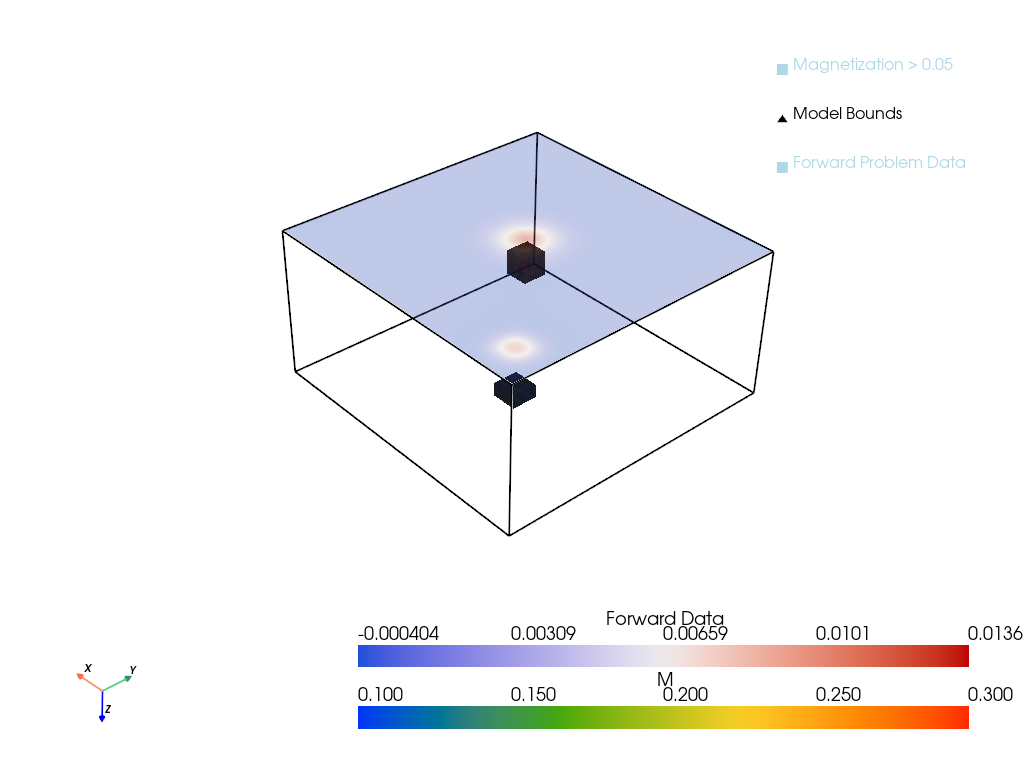

In [5]:
# | fig-cap: "A simple model and forward data."
# | code-fold: false

p = pv.Plotter()
D = forMod(M)
D = D.squeeze()
p = plot_model_with_forward(M, D, h, height=0, plotter=p)
output_file = "magnetic_inversion_plot.png"
p.show(screenshot=output_file)